## Resultados modelo cinemático inverso teórico

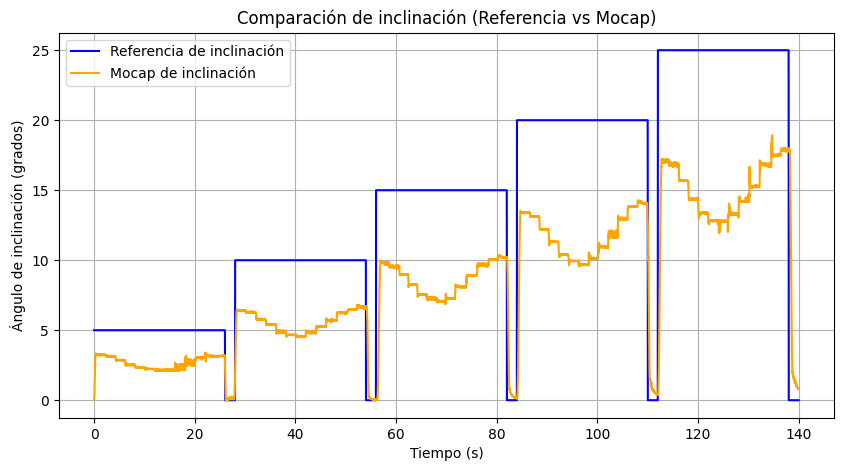

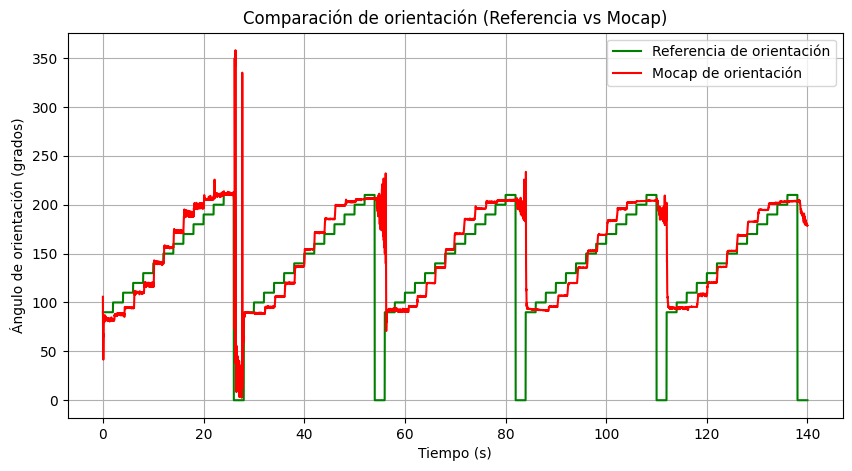

In [ ]:
#MODELO CINEMÁTICO INVERSO
# read data from google drive
data1 = pd.read_excel('/content/drive/MyDrive/TEST1.5_ALINEADOS.xlsx')

# Grados a radianes
data1['RotationX_rad'] = np.radians(data1['RotationX_deg'])
data1['RotationZ_rad'] = np.radians(data1['RotationZ_deg'])

# Pitch y Yaw a inclinación orientación
data1['Inclination_mocap_deg'] = np.sqrt(data1['RotationX_deg']**2 + data1['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data1['Orientation_mocap_deg'] = np.degrees(np.arctan2(data1['RotationZ_rad'], - data1['RotationX_rad'])) % 360

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data1['Time'], data1['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data1['Time'], data1['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data1['Time'], data1['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data1['Time'], data1['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

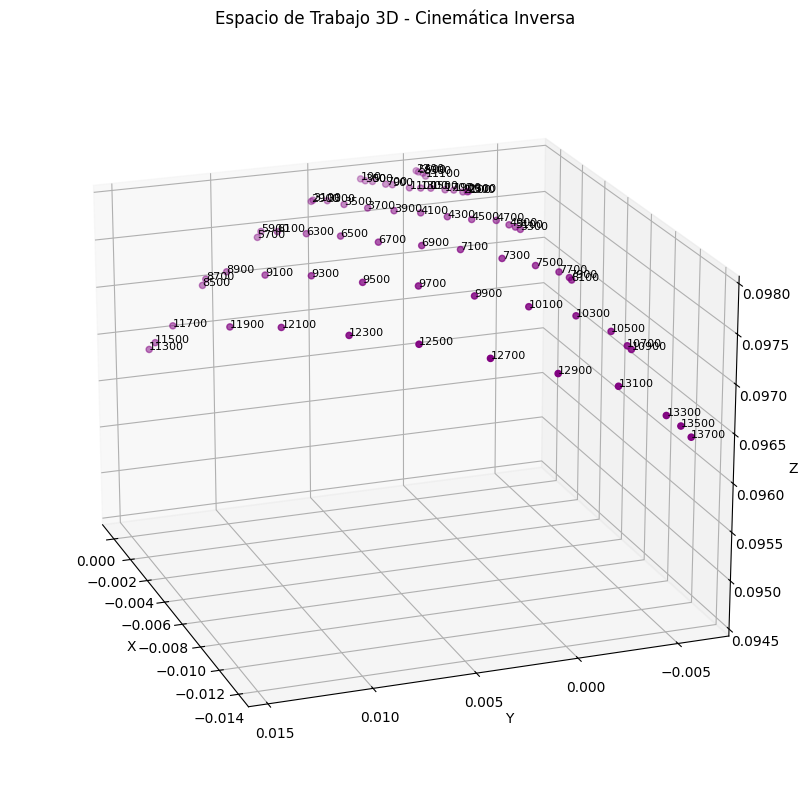

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data1.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - Cinemática Inversa')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Resultados RandomForest

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


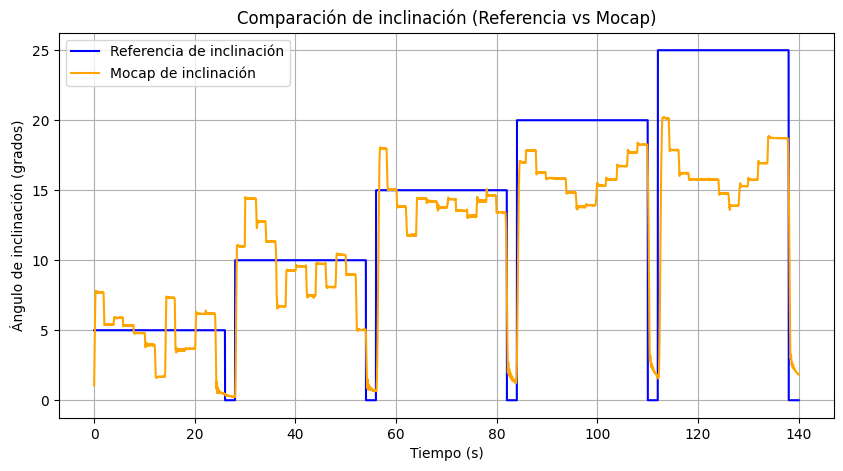

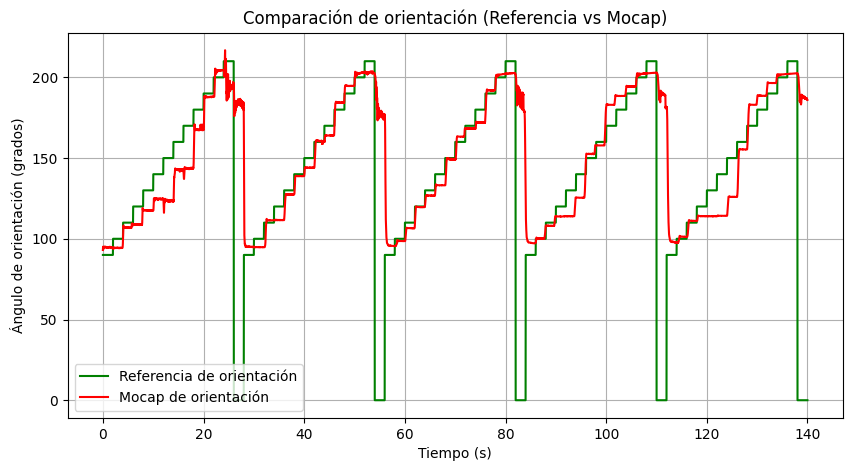

In [ ]:
#VALIDATION RANDOMFOREST
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')
data3 = pd.read_excel('/content/drive/MyDrive/RandomForest_ALINEADOS.xlsx')

data3['RotationX_rad'] = np.radians(data3['RotationX_deg'])
data3['RotationZ_rad'] = np.radians(data3['RotationZ_deg'])

data3['Inclination_mocap_deg'] = np.sqrt(data3['RotationX_deg']**2 + data3['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data3['Orientation_mocap_deg'] = np.degrees(np.arctan2(data3['RotationZ_rad'], - data3['RotationX_rad'])) % 360
data3.to_excel('/content/drive/MyDrive/dataRandomForest_completo.xlsx', index=False)

import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data3['Time'], data3['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data3['Time'], data3['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data3['Time'], data3['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data3['Time'], data3['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


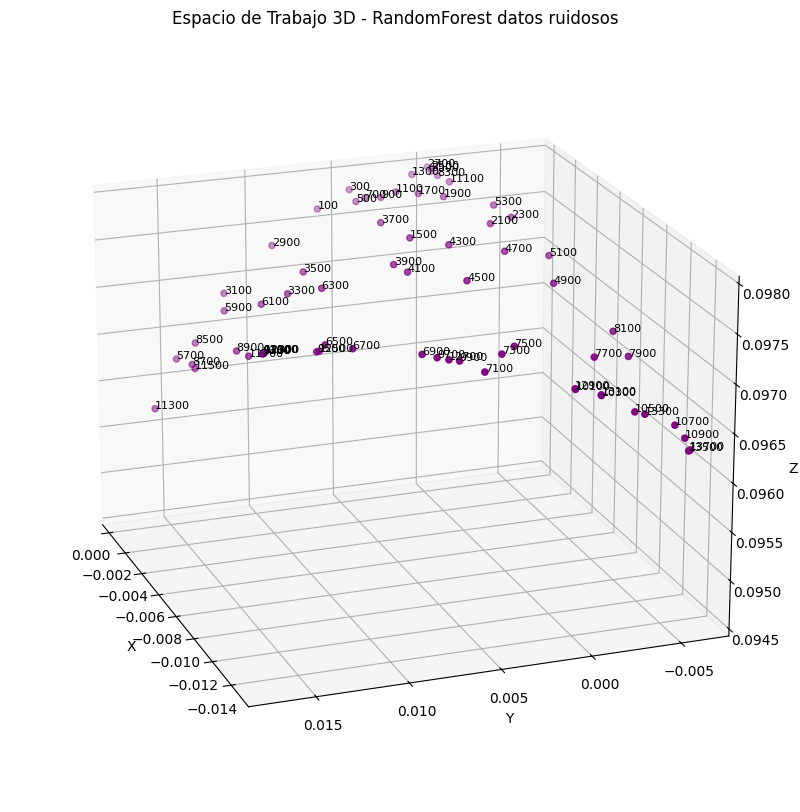

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data3.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - RandomForest datos ruidosos')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Resultados Light Gradient Boosting

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


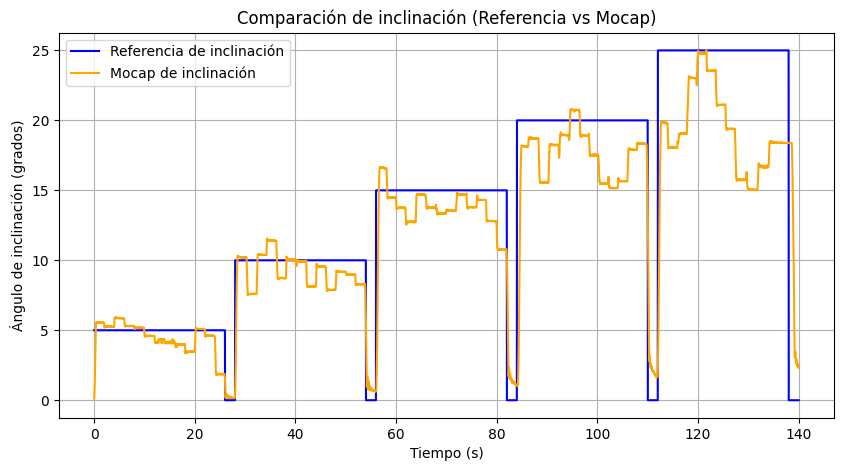

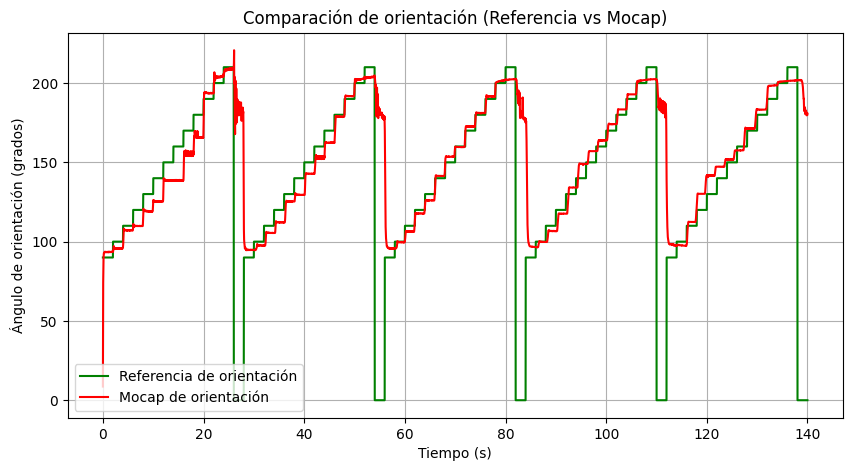

In [ ]:
#VALIDATION LIGHT GRADIENT BOOSTING
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data2 = pd.read_excel('/content/drive/MyDrive/GradientBoostingcleaned2_ALINEADOS.xlsx')

data2['RotationX_rad'] = np.radians(data2['RotationX_deg'])
data2['RotationZ_rad'] = np.radians(data2['RotationZ_deg'])

data2['Inclination_mocap_deg'] = np.sqrt(data2['RotationX_deg']**2 + data2['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data2['Orientation_mocap_deg'] = np.degrees(np.arctan2(data2['RotationZ_rad'], - data2['RotationX_rad'])) % 360
data2.to_excel('/content/drive/MyDrive/dataGradientBoostingcleaned2_completo.xlsx', index=False)

import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data2['Time'], data2['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data2['Time'], data2['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data2['Time'], data2['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data2['Time'], data2['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


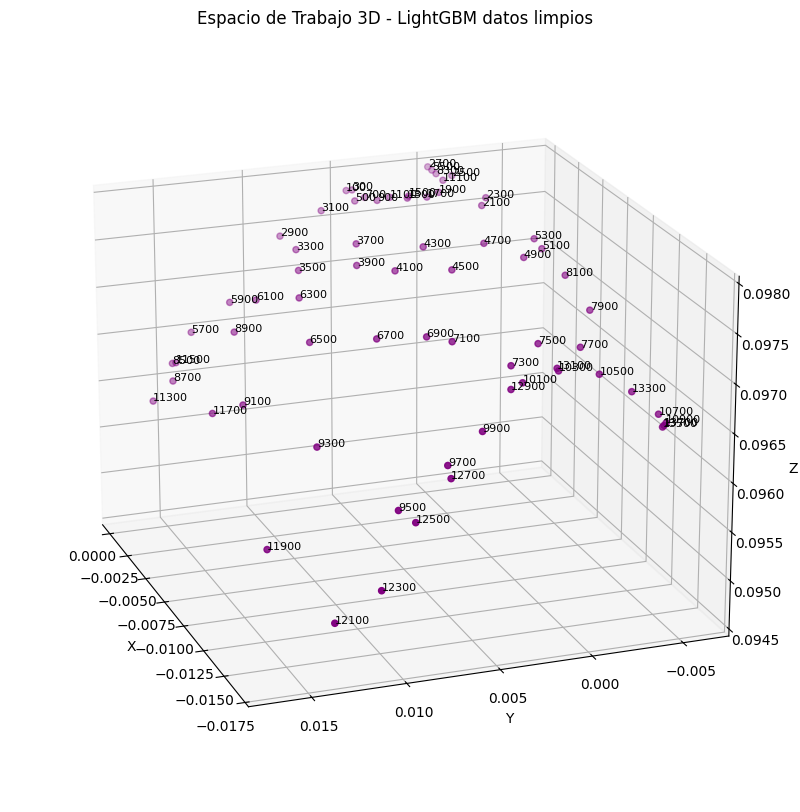

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data2.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - LightGBM datos limpios')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Resultados KNeighbors

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


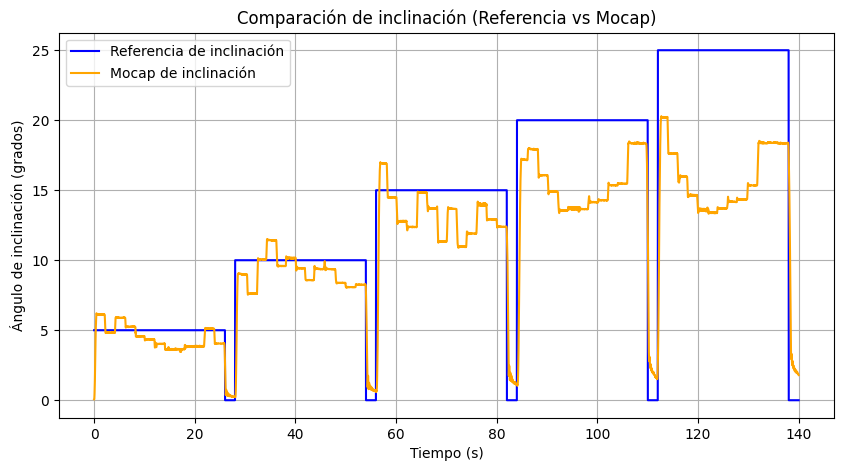

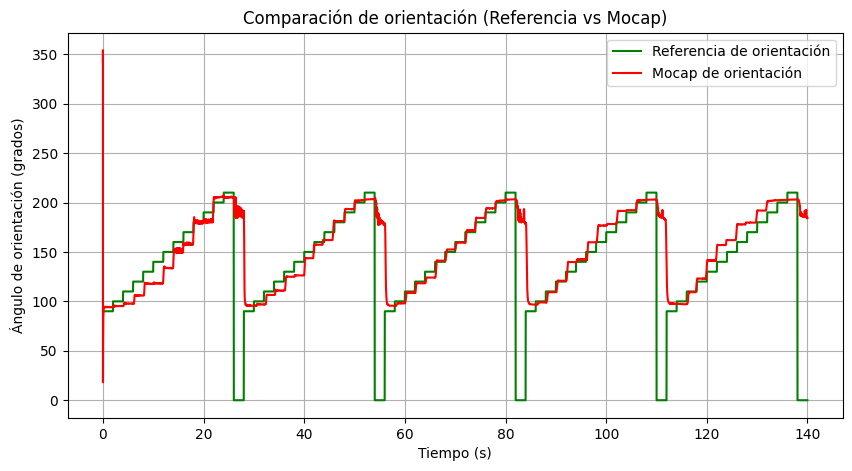

In [ ]:
#VALIDATION KNeighbors
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data4 = pd.read_excel('/content/drive/MyDrive/KNeighborscleaned_ALINEADOS.xlsx')

data4['RotationX_rad'] = np.radians(data4['RotationX_deg'])
data4['RotationZ_rad'] = np.radians(data4['RotationZ_deg'])

data4['Inclination_mocap_deg'] = np.sqrt(data4['RotationX_deg']**2 + data4['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data4['Orientation_mocap_deg'] = np.degrees(np.arctan2(data4['RotationZ_rad'], - data4['RotationX_rad'])) % 360
data4.to_excel('/content/drive/MyDrive/dataKNeighborscleaned_completo.xlsx', index=False)

import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data4['Time'], data4['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data4['Time'], data4['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data4['Time'], data4['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data4['Time'], data4['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


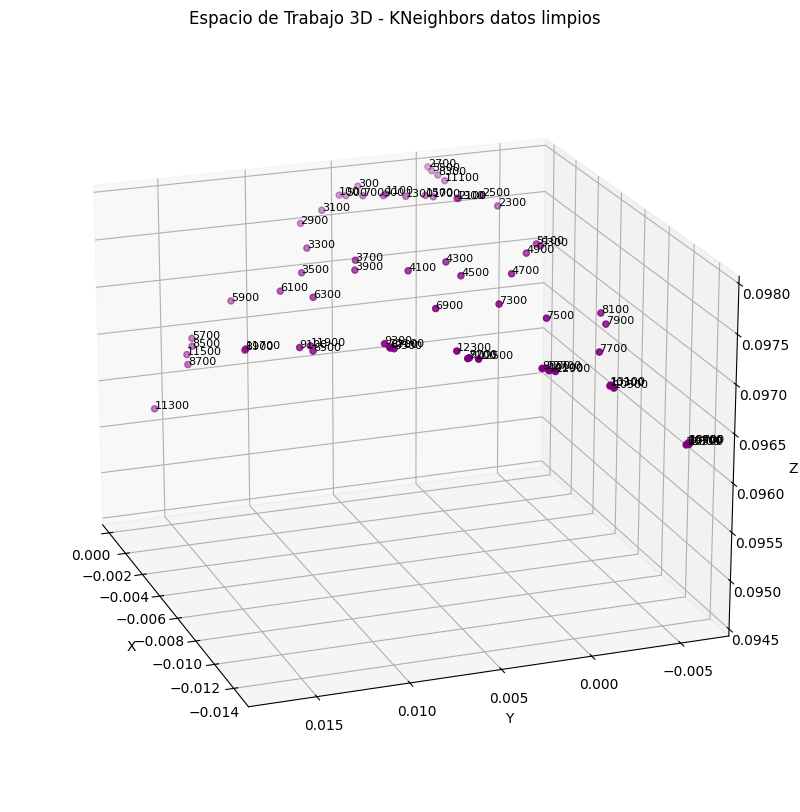

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data4.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - KNeighbors datos limpios')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Resultados Red Neuronal Constante ELU 1 (20 neuronas 5 capas)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


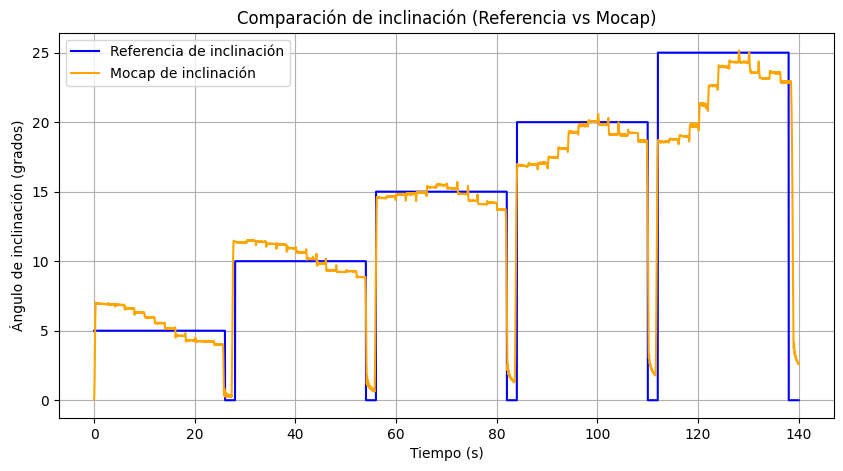

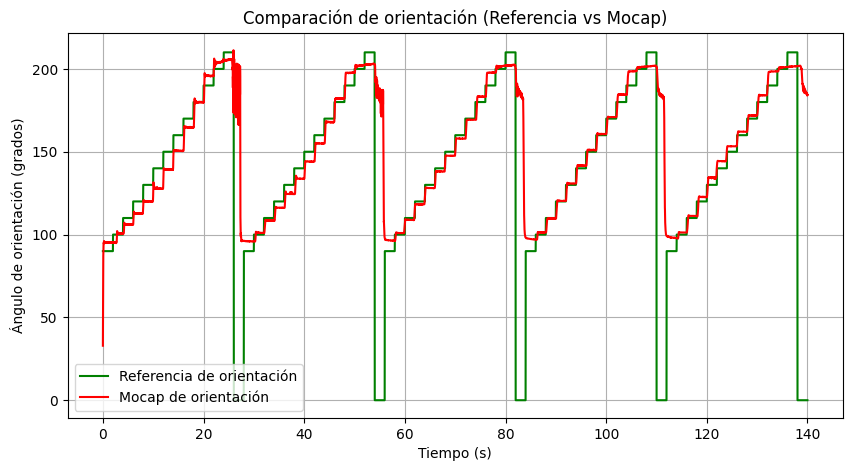

In [ ]:
#VALIDATION
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data5 = pd.read_excel('/content/drive/MyDrive/model1elucleaned_ALINEADOS.xlsx')

data5['RotationX_rad'] = np.radians(data5['RotationX_deg'])
data5['RotationZ_rad'] = np.radians(data5['RotationZ_deg'])

data5['Inclination_mocap_deg'] = np.sqrt(data5['RotationX_deg']**2 + data5['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data5['Orientation_mocap_deg'] = np.degrees(np.arctan2(data5['RotationZ_rad'], - data5['RotationX_rad'])) % 360
data5.to_excel('/content/drive/MyDrive/datamodel1elucleaned_completo.xlsx', index=False)

import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data5['Time'], data5['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data5['Time'], data5['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data5['Time'], data5['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data5['Time'], data5['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


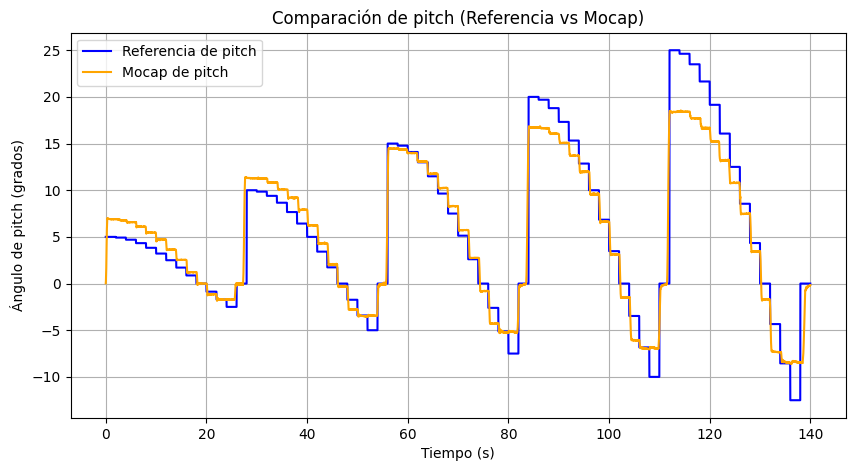

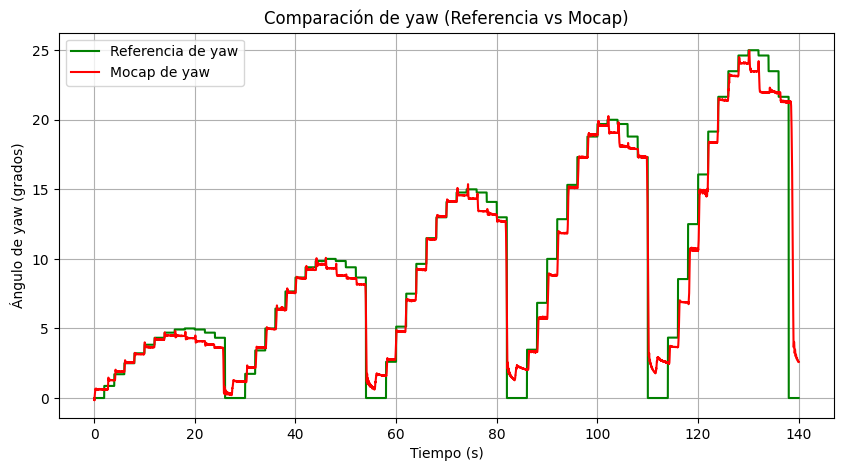

In [ ]:
# Crear el primer gráfico: PITCH
plt.figure(figsize=(10, 5))
plt.plot(data5['Time'], data5['Pitch_deg'], label='Referencia de pitch', color='blue')
plt.plot(data5['Time'], data5['RotationZ_deg'], label='Mocap de pitch', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de pitch (grados)')
plt.title('Comparación de pitch (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: YAW
plt.figure(figsize=(10, 5))
plt.plot(data5['Time'], data5['Yaw_deg'], label='Referencia de yaw', color='green')
plt.plot(data5['Time'], data5['RotationX_deg'], label='Mocap de yaw', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de yaw (grados)')
plt.title('Comparación de yaw (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

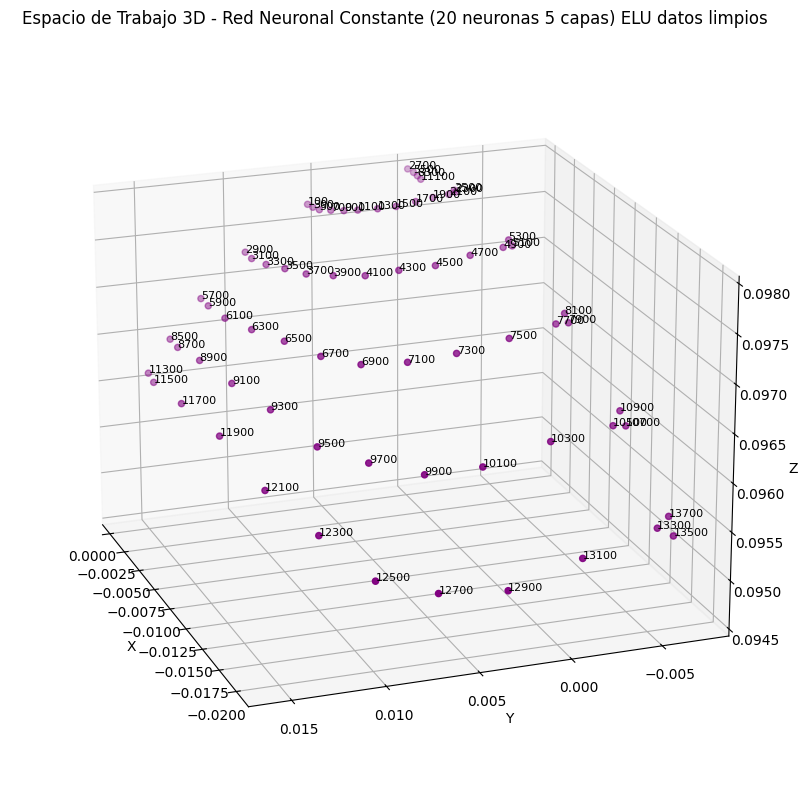

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data5.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - Red Neuronal Constante (20 neuronas 5 capas) ELU datos limpios')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Resultados Red Neuronal Constante ELU 2 (20 neuronas 10 capas)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


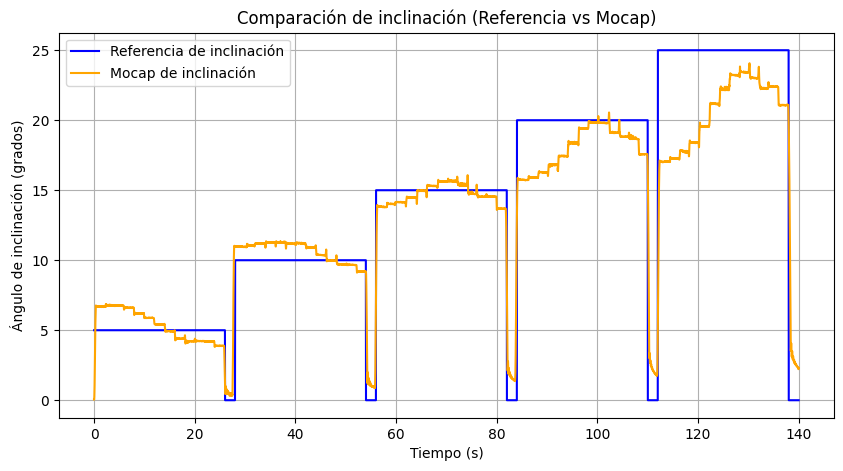

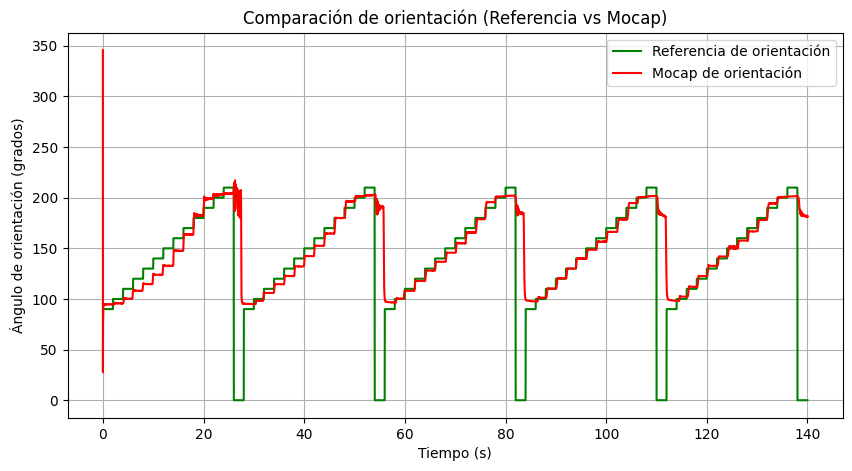

In [ ]:
#VALIDATION
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data6 = pd.read_excel('/content/drive/MyDrive/model2elu_ALINEADOS.xlsx')

data6['RotationX_rad'] = np.radians(data6['RotationX_deg'])
data6['RotationZ_rad'] = np.radians(data6['RotationZ_deg'])

data6['Inclination_mocap_deg'] = np.sqrt(data6['RotationX_deg']**2 + data6['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data6['Orientation_mocap_deg'] = np.degrees(np.arctan2(data6['RotationZ_rad'], - data6['RotationX_rad'])) % 360
data6.to_excel('/content/drive/MyDrive/datamodel2elu_completo.xlsx', index=False)

import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data6['Time'], data6['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data6['Time'], data6['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data6['Time'], data6['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data6['Time'], data6['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


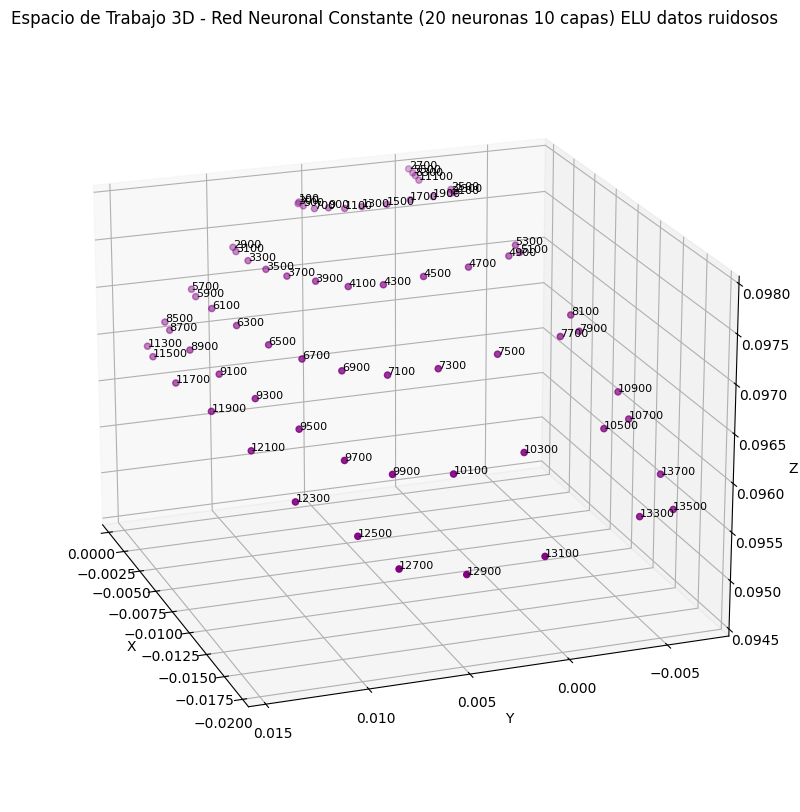

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data6.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - Red Neuronal Constante (20 neuronas 10 capas) ELU datos ruidosos')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Resultados Red Neuronal Simétrica ELU 1 (5-10-15-10-5) BUENA


In [ ]:
#VALIDATION MODEL4ELU
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data = pd.read_excel('/content/drive/MyDrive/model4elucleaned_ALINEADOS.xlsx')

data['RotationX_rad'] = np.radians(data['RotationX_deg'])
data['RotationZ_rad'] = np.radians(data['RotationZ_deg'])

data['Inclination_mocap_deg'] = np.sqrt(data['RotationX_deg']**2 + data['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data['Orientation_mocap_deg'] = np.degrees(np.arctan2(data['RotationZ_rad'], - data['RotationX_rad'])) % 360
data.to_excel('/content/drive/MyDrive/datamodel4elucleaned_completo.xlsx', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


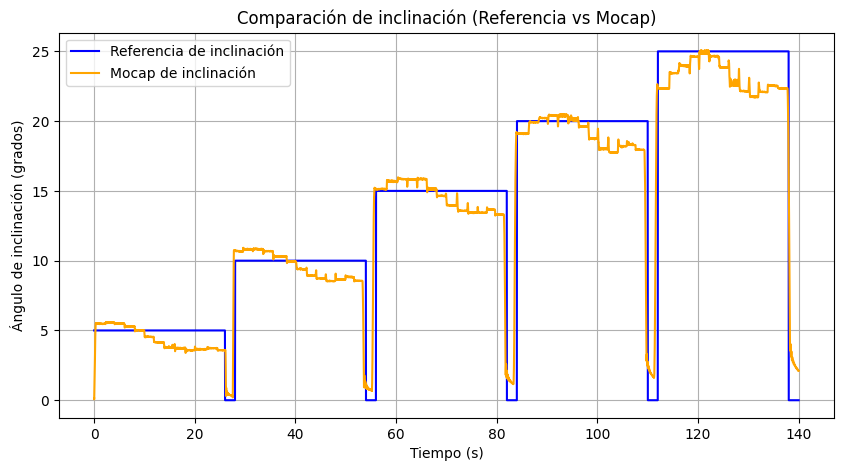

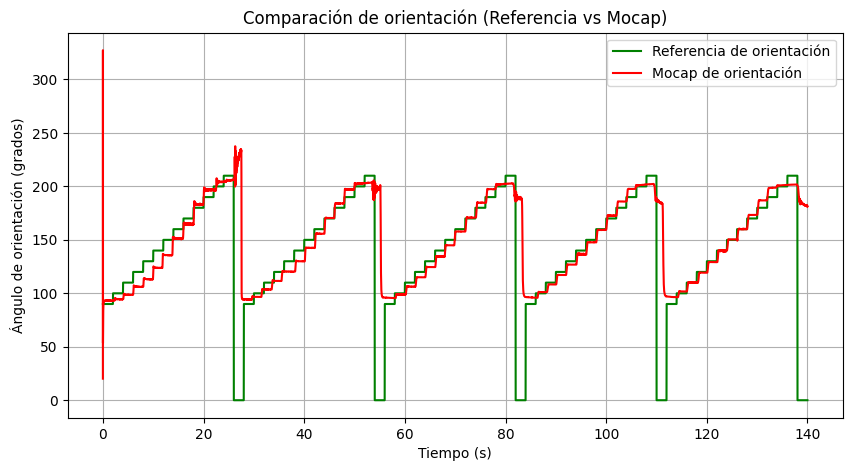

In [ ]:
import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data['Time'], data['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data['Time'], data['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


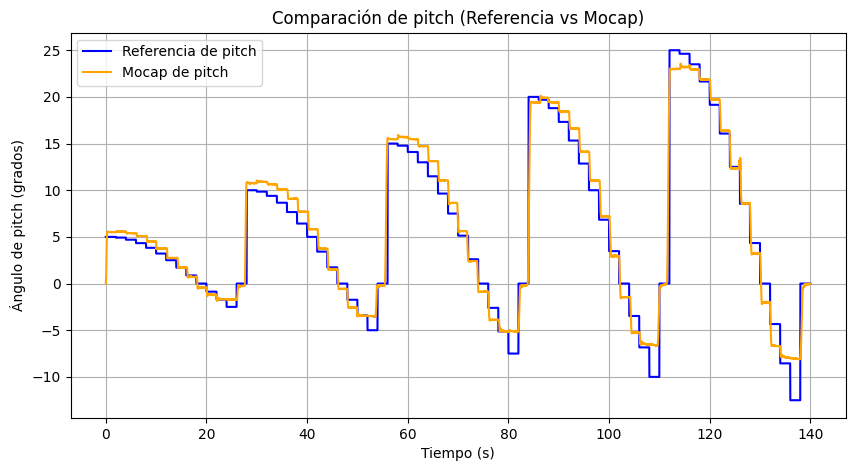

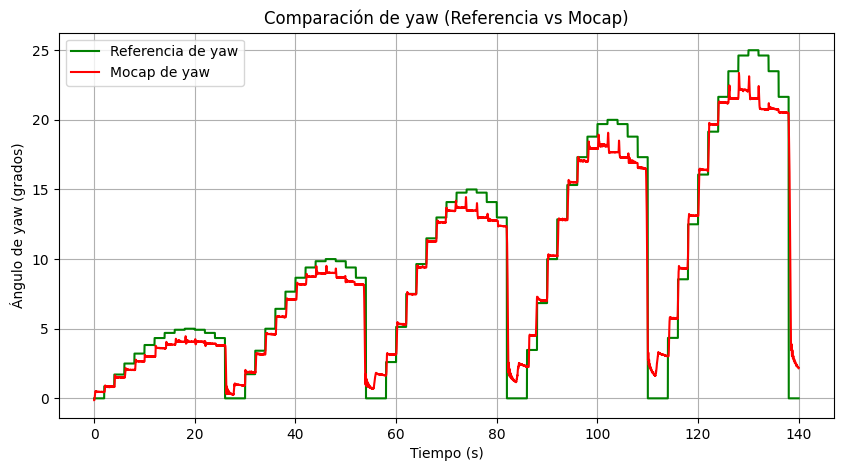

In [ ]:
# Crear el primer gráfico: PITCH
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Pitch_deg'], label='Referencia de pitch', color='blue')
plt.plot(data['Time'], data['RotationZ_deg'], label='Mocap de pitch', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de pitch (grados)')
plt.title('Comparación de pitch (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: YAW
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Yaw_deg'], label='Referencia de yaw', color='green')
plt.plot(data['Time'], data['RotationX_deg'], label='Mocap de yaw', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de yaw (grados)')
plt.title('Comparación de yaw (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

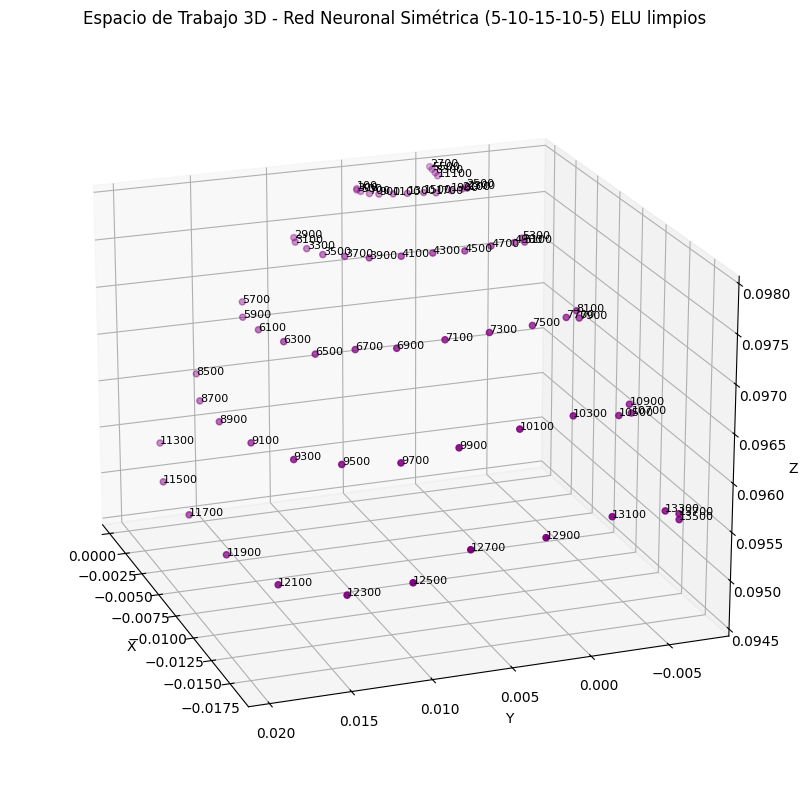

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data.iloc[range(100, 13800, 200)] #quitar algunos indices de cuando está en el 0 que ahí no nos interesa

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - Red Neuronal Simétrica (5-10-15-10-5) ELU limpios')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()


## Red Neuronal Alternada ELU 1 (5-10-5-10)

Mounted at /content/drive


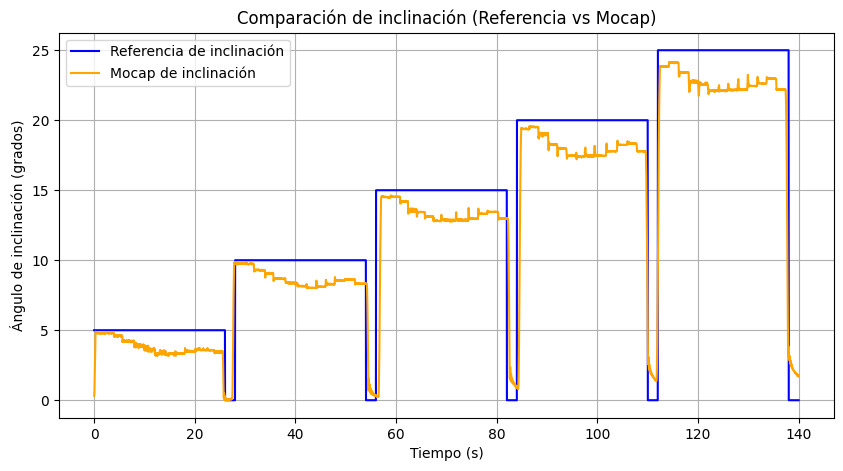

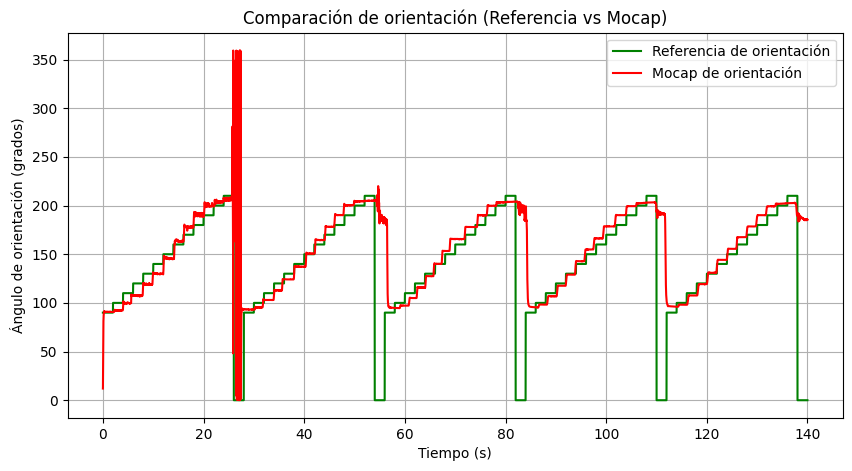

In [ ]:
#VALIDATION
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data7 = pd.read_excel('/content/drive/MyDrive/model7elucleaned_ALINEADOS.xlsx')

data7['RotationX_rad'] = np.radians(data7['RotationX_deg'])
data7['RotationZ_rad'] = np.radians(data7['RotationZ_deg'])

data7['Inclination_mocap_deg'] = np.sqrt(data7['RotationX_deg']**2 + data7['RotationZ_deg']**2) #YAW = ROTX // PITCH = ROTZ
data7['Orientation_mocap_deg'] = np.degrees(np.arctan2(data7['RotationZ_rad'], - data7['RotationX_rad'])) % 360
data7.to_excel('/content/drive/MyDrive/datamodel7elucleaned_completo.xlsx', index=False)

import matplotlib.pyplot as plt

# Crear el primer gráfico: Inclinación
plt.figure(figsize=(10, 5))
plt.plot(data7['Time'], data7['Inclination_deg'], label='Referencia de inclinación', color='blue')
plt.plot(data7['Time'], data7['Inclination_mocap_deg'], label='Mocap de inclinación', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de inclinación (grados)')
plt.title('Comparación de inclinación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()

# Crear el segundo gráfico: Orientación
plt.figure(figsize=(10, 5))
plt.plot(data7['Time'], data7['Orientation_deg'], label='Referencia de orientación', color='green')
plt.plot(data7['Time'], data7['Orientation_mocap_deg'], label='Mocap de orientación', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo de orientación (grados)')
plt.title('Comparación de orientación (Referencia vs Mocap)')
plt.legend()
plt.grid(True)
plt.show()


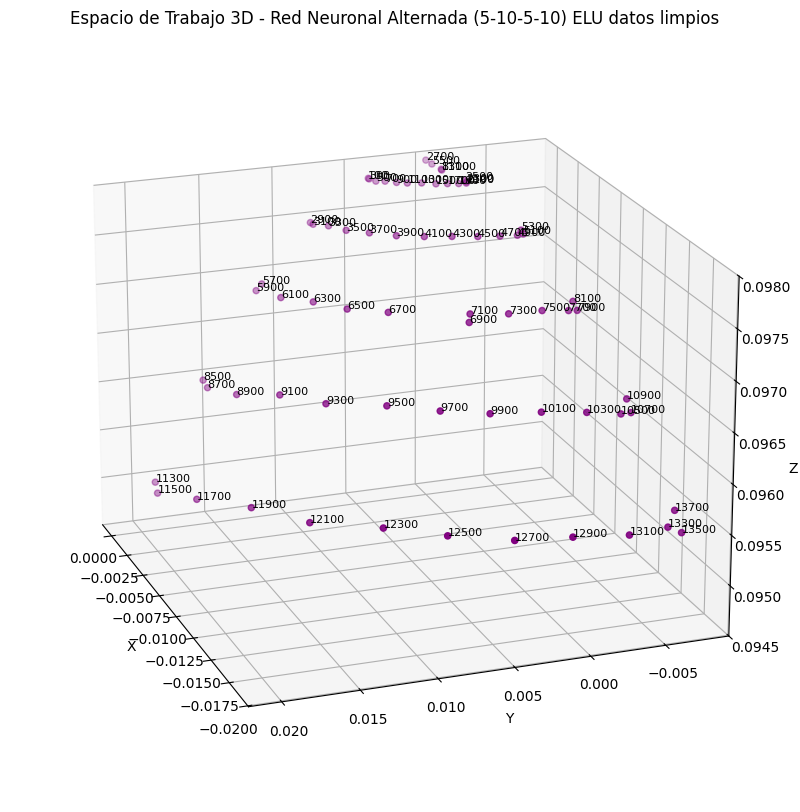

In [ ]:
#REPRESENTACION DEL ESPACIO TRABAJO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define L0
L0 = 0.098  # longitud del dedo en m

# Inicializa listas para coordenadas
OPo_x = []
OPo_y = []
OPo_z = []

data_key_points = data7.iloc[range(100, 13800, 200)]

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

# Itera sobre los datos
for idx, (incli, orient) in enumerate(zip(data_key_points['Inclination_mocap_deg'], data_key_points['Orientation_mocap_deg'])):
    # Cálculo de s0 y t0
    if math.radians(incli) != 0:  # Evita división por cero
        s0 = L0 * (1 - math.cos(math.radians(incli))) / math.radians(incli)
        t0 = L0 * math.sin(math.radians(incli)) / math.radians(incli)
    else:
        s0 = 0
        t0 = L0  # Si inclinación es 0, z es L0

    # Coordenadas x, y, z
    x = s0 * math.cos(math.radians(orient))
    y = s0 * math.sin(math.radians(orient))
    z = t0
    #print(f"Fila {data_key_points.index[idx]}: X = {x:.4f}, Y = {y:.4f}, Z = {z:.4f}")

    # Agrega a las listas
    OPo_x.append(x)
    OPo_y.append(y)
    OPo_z.append(z)

    # Añadir el número de fila al lado de cada punto
    ax1.text(x, y, z, str(data_key_points.index[idx]), color='black', fontsize=8)

# Configuramos títulos y etiquetas
ax1.title.set_text('Espacio de Trabajo 3D - Red Neuronal Alternada (5-10-5-10) ELU datos limpios')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Dibujamos los puntos 3D
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

ax1.view_init(elev=20, azim=160)  # Cambia los valores de elev y azim según sea necesario

# Ajuste de los límites del gráfico para que el eje Z vaya de 0 a L0
ax1.set_zlim([0.0945, L0])  # Ajuste del eje Z

# Mostramos el gráfico
plt.show()